## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 
- However, there are some additional questions along the way that don't fit neatly into the one main example we'll walk through. Any question that isn't explicitly part of the main example is marked with **(detour)** at the start of the question.

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

1. Which question(s) answered regarding a particular feature have high association with left-handedness?
2. As an answer to a specific quesion changes, are people more or less likely to be left-handed?
3. Does the distribution of handedness vary based one's response to questions?

---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("../4_01-lab-classification_model_comparison/data.csv",sep='\t')
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

In [6]:
df.gender.unique()

array([1, 2, 3, 0])

1. We should question whether or not we need to gather the sexual orientation/gender identity data. If it is necessary for what we want to study, then we need to be smart about including it. If it not necessary, then we should not be gathering this data!

2. If the survey is not optional already, make it optional. If we're only including surveys that are complete, we should allow for people to complete only certain questions instead of making all questions required.

3. We should collect this data anonymously, not confidentially. Anonymously means we do not collect personally identifiable information (PII). Confidential means we collect PII but we don't make that available to others. If we have access to names or social security numbers, it means that someone could hack us and connect names/SSNs with gender, orientation, etc. Instead, we should collect the data without names or anything so that even if our data are hacked, it is much harder to connect responses with an individual.

4. From the perspective of inclusivity, we want to make sure our responses fit everyone trying to respond. For example, for the gender category, we should at minimum have a male, female, and other category. However, we might consider including options for transgender individuals, having only a fill-in-the-blank response instead of explicit choices, and/or having "prefer to not answer" category.

5. For a particularly advanced option, there's an area of study called differential privacy that allows us to study population-level effects without exposing any individual. Consider the following example:

Have each respondent flip a coin.
If the respondent flips heads, have them answer the "gender" question honestly.
If the respondent flips tails, have them answer the "gender" question with "transgender."
This way, an individual who answers "transgender" may or may not actually be transgender. Someone who hacks the data would never be able to know who truly identifies as transgender versus who identifies as transgender based on the coin flip. However, because we know approximately how many coin flips should be heads versus tails, we can estimate the percentage of individuals who are transgender. This allows us to study what we want to study but also allows us to maintain privacy for individuals!

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [7]:
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand'],
      dtype='object')

In [8]:
df.describe(include = 'all')

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,...,4184,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.962715,3.829589,2.846558,3.186902,2.865440,3.672084,3.216539,3.184512,2.761233,3.522945,...,NaN,1.576243,1.239962,30.370698,2.317878,1.654398,1.833413,5.013623,2.394359,1.190966
std,1.360291,1.551683,1.664804,1.476879,1.545798,1.342238,1.490733,1.387382,1.511805,1.242890,...,NaN,0.494212,0.440882,367.201726,0.874264,0.640915,1.303454,1.970996,2.184164,0.495357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,...,NaN,1.000000,1.000000,18.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,...,NaN,2.000000,1.000000,21.000000,2.000000,2.000000,1.000000,6.000000,2.000000,1.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,...,NaN,2.000000,1.000000,27.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000


In [9]:
df.isnull().sum()

Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
Q6             0
Q7             0
Q8             0
Q9             0
Q10            0
Q11            0
Q12            0
Q13            0
Q14            0
Q15            0
Q16            0
Q17            0
Q18            0
Q19            0
Q20            0
Q21            0
Q22            0
Q23            0
Q24            0
Q25            0
Q26            0
Q27            0
Q28            0
Q29            0
Q30            0
Q31            0
Q32            0
Q33            0
Q34            0
Q35            0
Q36            0
Q37            0
Q38            0
Q39            0
Q40            0
Q41            0
Q42            0
Q43            0
Q44            0
introelapse    0
testelapse     0
country        0
fromgoogle     0
engnat         0
age            0
education      0
gender         0
orientation    0
race           0
religion       0
hand           0
dtype: int64

Indicates that there is no missing data!

In [14]:
df.dtypes

Q1              int64
Q2              int64
Q3              int64
Q4              int64
Q5              int64
Q6              int64
Q7              int64
Q8              int64
Q9              int64
Q10             int64
Q11             int64
Q12             int64
Q13             int64
Q14             int64
Q15             int64
Q16             int64
Q17             int64
Q18             int64
Q19             int64
Q20             int64
Q21             int64
Q22             int64
Q23             int64
Q24             int64
Q25             int64
Q26             int64
Q27             int64
Q28             int64
Q29             int64
Q30             int64
Q31             int64
Q32             int64
Q33             int64
Q34             int64
Q35             int64
Q36             int64
Q37             int64
Q38             int64
Q39             int64
Q40             int64
Q41             int64
Q42             int64
Q43             int64
Q44             int64
introelapse     int64
testelapse

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns

%matplotlib inline

In [52]:
selected_df = df.drop(columns=['introelapse', 'testelapse', 'country',
                      'fromgoogle', 'engnat', 'age', 'education',
                      'gender', 'orientation', 'race', 'religion',
                      'hand'], axis = 1)

In [53]:
selected_df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44'],
      dtype='object')

In [54]:
selected = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44']

(44.0, 0.0)

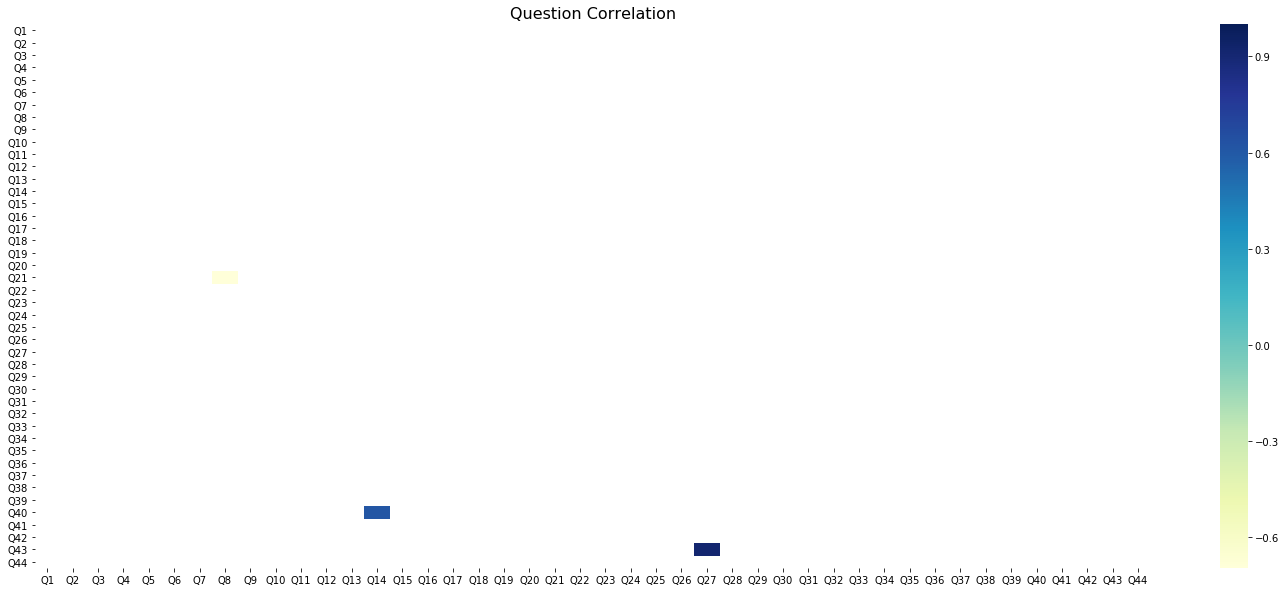

In [68]:
selected_corr = df[selected].corr()
selected_corr = selected_corr[np.abs(selected_corr)>.5]

plt.figure(figsize = (25,10))
plt.title('Question Correlation', fontsize = 16)
mask = np.zeros(selected_corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
ax = sns.heatmap(selected_corr,mask=mask, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

High correlations between Qns:
1. Qn8 vs Qn21
2. Qn14 vs Qn40
3. Qn27 vs Qn43

Should we remove these highly correlated variables as they might skew the association with the feature of left handness?

---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

This would be a classification problem as the output (whether or not the person is left-handed) is discrete.

### (detour) 6. While this isn't the problem we set out to solve, suppose I wanted to predict the exact age of the respondent using Q1 - Q44 as my predictors. Would this be a classification or regression problem? Why?

This would be a regression problem as the output (the age of the person) is continuous.

### 7. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

When we want to put our variables on the same scale, we often will standardize them. An explicit example might be predicting income based on GPA and square footage of one's house. If we built a linear regression model predicting income from GPA and square feet, the coefficient from GPA would probably be quite large (because a one-unit change in GPA is substantial) whereas the coefficient from square feet would probably be quite small (because a one-unit change in square feet is almost negligible). If we plan to regularize, the GPA coefficient will be penalized just because it's large whereas the square feet coefficient will probably not be affected much at all.

In the context of  𝑘 -nearest neighbors, it's especially important to standardize our variables. If we're trying to see which observations are "close" to one another and we have two variables that are on very different scales, then one variable will make observations look close to one another. For example, observations will look close based on GPA but far away based on square footage. The nearest neighbors will be almost entirely determined by square footage and not by GPA.

### 8. Give an example of when we might not standardize our variables.

If our variables are already on the same scale, it doesn't make sense to standardize them. If we want to interpret our variables on their original scale, standardizing will make that interpretation more difficult.

### 9. Based on your answers to 7 and 8, do you think we should standardize our predictor variables in this case? Why or why not?

If we're only using Q1-Q44 as predictors, I would probably not standardize our predictor variables. They're already on the same scale (1 to 5) and I might want the interpretability of a one-unit increase in the response to an individual question.

### 10. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

In [71]:
df.hand.value_counts()

1    3542
2     452
3     179
0      11
Name: hand, dtype: int64

In [76]:
df.hand.value_counts('0')

1    0.846558
2    0.108031
3    0.042782
0    0.002629
Name: hand, dtype: float64

We want to predict whether or not a person is left-handed. Looking at df['hand'].value_counts(), we have four categories. Instead, I want to convert everything to 1s and 0s. Specifically, I'll map 2 (left-handed) to be 1 and I'll map everything else (0, 1, 3) to be 0.

I have dropped the 11 "missing" values of 0. This misay be a valid thing to do in this case, because we do not know whether the 0 refers to "left-handed" or "not left-handed" and it may not make sense to include them where our predicted value is missing. However, given that the proportion of 0s is so low, it's unlikely that this will substantially affect our model.

In [77]:
df['hand'].value_counts()

1    3542
2     452
3     179
0      11
Name: hand, dtype: int64

In [78]:
df['y'] = [1 if i == 2 else 0 for i in df['hand']]

In [79]:
df['y'].value_counts()

0    3732
1     452
Name: y, dtype: int64

In [80]:
df = df[df['hand'] != 0].reset_index()

In [82]:
df.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand,y
0,0,4,1,5,1,5,1,5,1,4,...,2,1,22,3,1,1,3,2,3,0
1,1,1,5,1,4,2,5,5,4,1,...,2,1,14,1,2,2,6,1,1,0
2,2,1,2,1,1,5,4,3,2,1,...,2,2,30,4,1,1,1,1,2,1
3,3,1,4,1,5,1,4,5,4,3,...,2,1,18,2,2,5,3,2,2,1
4,4,5,1,5,1,5,1,5,1,3,...,2,1,22,3,1,1,3,2,3,0


### 11. The professor for whom you work suggests that you set $k = 4$. Why might this be a bad idea in this specific case?

Having an even number of categories may lead us to having ties when predicting a discrete output. For example, maybe two nearest neighbors are right-handed and two nearest neighbors are left-handed. Any prediction in this case would be arbitrary, because it's equally likely (based on the data) for that individual to be left- or right-handed. It is almost always a good option to pick a value for  𝑘  that is not divisible by the number of categories you seek to predict!

### 12. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

> Instantiate and fit your models.

In [83]:
X = df.drop(columns=['index', 'introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand', 'y'], axis = 1)

y = df['y']

In [84]:
from sklearn import model_selection

In [85]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
k_3 = KNeighborsClassifier(n_neighbors = 3)
k_3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [88]:
k_5 = KNeighborsClassifier(n_neighbors = 5)
k_5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [89]:
k_15 = KNeighborsClassifier(n_neighbors = 15)
k_15.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [90]:
k_25 = KNeighborsClassifier(n_neighbors = 25)
k_25.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 13. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

Surprisingly, there is default regularization!

penalty = 'l2' indicates the L2 or Ridge penalty.
C = 1.0 indicates that the inverse of our regularization strength is 1. Note that  𝐶=1𝛼⇒1=1𝛼⇒𝛼=1 .
Our loss function would then include add  𝛼∑𝑝𝑖=1𝛽̂ 2𝑖  as a penalty, where  𝛼=1 .

### 14. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features? Well, the answer is (as always), **it depends**. What is one reason you would standardize? What is one reason you would not standardize?

Answer:

- An example of when I would standardize in logistic regression is if I wanted to implement regularization. If I did not regularize, I would improperly penalize coefficients simply for the scale of their variables.
- An example of when I would not standardize in logistic regression is when I want to maintain interpretability of my variables or if my variables are already on the same scale.


### 15. Let's use logistic regression to predict whether or not the person is left-handed.


> Be sure to use the same train/test split with your data as with your $k$-NN model above!

> Create four separate models, one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

> Instantiate and fit your models.

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
lasso_1 = LogisticRegression(penalty = 'l1', C = 1.0)
lasso_1.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
lasso_10 = LogisticRegression(penalty = 'l1', C = 0.1)
lasso_10.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
ridge_1 = LogisticRegression(penalty = 'l2', C = 1.0)
ridge_1.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
ridge_10 = LogisticRegression(penalty = 'l2', C = 0.1)
ridge_10.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
lasso_1.coef_

array([[-0.01107843, -0.00588098, -0.01412178, -0.05962907,  0.03936884,
        -0.00054637, -0.00445846, -0.18021746, -0.00976282,  0.030527  ,
        -0.00209141,  0.00474104, -0.06746218,  0.05776653, -0.07140683,
         0.04056613,  0.02737649, -0.02444325, -0.00118865, -0.06539879,
        -0.06395646, -0.09506636, -0.01624604, -0.03439506,  0.04931658,
         0.09829253,  0.04098493, -0.04387918,  0.03588612,  0.00987317,
         0.00570794,  0.01032495, -0.04162137, -0.01799096,  0.03856563,
        -0.02899375, -0.03278705,  0.07536159, -0.06341798, -0.11188421,
        -0.03283378, -0.05801698, -0.11602125,  0.03270412]])

In [97]:
lasso_10.coef_

array([[ 0.00000000e+00, -2.91455323e-04, -1.71272889e-03,
        -3.98002951e-02,  2.05319163e-02,  0.00000000e+00,
         0.00000000e+00, -1.55511572e-01, -1.00286219e-04,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -5.83147600e-02,  1.83650465e-02, -5.57174415e-02,
         1.64558079e-02,  5.79881899e-03, -1.59921175e-02,
        -8.43115738e-05, -5.45414392e-02, -4.52876543e-02,
        -8.36017227e-02, -1.38245185e-02, -2.38474700e-02,
         2.22245155e-02,  7.71538372e-02,  0.00000000e+00,
        -2.79103393e-02,  1.27079458e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.76274229e-02,
        -5.93289337e-03,  7.98669086e-03, -1.22972051e-02,
        -2.75896860e-02,  4.57745306e-02, -4.54130593e-02,
        -7.16125910e-02, -2.13153140e-02, -4.11614040e-02,
        -6.91442586e-02,  4.36839350e-03]])

---
## Step 5: Evaluate the model(s).

### 16. Before calculating any score on your data, take a step back. Think about your $X$ variable and your $Y$ variable. Do you think your $X$ variables will do a good job of predicting your $Y$ variable? Why or why not?

No, I do not. We are predicting whether or not someone is left-handed based on a series of psychological factors. Psychological factors are probably not very likely to predict the hand with which someone writes.

### 17. Using accuracy as your metric, evaluate all eight of your models on both the training and testing sets. Put your scores below. (If you want to be fancy and generate a table in Markdown, there's a [Markdown table generator site linked here](https://www.tablesgenerator.com/markdown_tables#).)

In [98]:
print("k-nearest neighbors training accuracy with k = 3: " + str(k_3.score(X_train, y_train)))
print("k-nearest neighbors testing accuracy with k = 3: " + str(k_3.score(X_test, y_test)))

print("k-nearest neighbors training accuracy with k = 5: " + str(k_5.score(X_train, y_train)))
print("k-nearest neighbors testing accuracy with k = 5: " + str(k_5.score(X_test, y_test)))

print("k-nearest neighbors training accuracy with k = 15: " + str(k_15.score(X_train, y_train)))
print("k-nearest neighbors testing accuracy with k = 15: " + str(k_15.score(X_test, y_test)))

print("k-nearest neighbors training accuracy with k = 25: " + str(k_25.score(X_train, y_train)))
print("k-nearest neighbors testing accuracy with k = 25: " + str(k_25.score(X_test, y_test)))

print("logistic regression training accuracy with LASSO penalty, alpha = 1: " + str(lasso_1.score(X_train, y_train)))
print("logistic regression testing accuracy with LASSO penalty, alpha = 1: " + str(lasso_1.score(X_test, y_test)))

print("logistic regression training accuracy with LASSO penalty, alpha = 10: " + str(lasso_10.score(X_train, y_train)))
print("logistic regression testing accuracy with LASSO penalty, alpha = 10: " + str(lasso_10.score(X_test, y_test)))

print("logistic regression training accuracy with Ridge penalty, alpha = 1: " + str(ridge_1.score(X_train, y_train)))
print("logistic regression testing accuracy with Ridge penalty, alpha = 1: " + str(ridge_1.score(X_test, y_test)))

print("logistic regression training accuracy with Ridge penalty, alpha = 10: " + str(ridge_10.score(X_train, y_train)))
print("logistic regression testing accuracy with Ridge penalty, alpha = 10: " + str(ridge_10.score(X_test, y_test)))

k-nearest neighbors training accuracy with k = 3: 0.9057206775327581
k-nearest neighbors testing accuracy with k = 3: 0.85727969348659
k-nearest neighbors training accuracy with k = 5: 0.8910194950463407
k-nearest neighbors testing accuracy with k = 5: 0.8812260536398467
k-nearest neighbors training accuracy with k = 15: 0.8906999041227229
k-nearest neighbors testing accuracy with k = 15: 0.8936781609195402
k-nearest neighbors training accuracy with k = 25: 0.8910194950463407
k-nearest neighbors testing accuracy with k = 25: 0.8936781609195402
logistic regression training accuracy with LASSO penalty, alpha = 1: 0.8913390859699585
logistic regression testing accuracy with LASSO penalty, alpha = 1: 0.8936781609195402
logistic regression training accuracy with LASSO penalty, alpha = 10: 0.8913390859699585
logistic regression testing accuracy with LASSO penalty, alpha = 10: 0.8936781609195402
logistic regression training accuracy with Ridge penalty, alpha = 1: 0.8913390859699585
logistic r

**Answer:**

|        Model        |    Value of $k$   | Penalty |   Value of $\alpha$   | Training Accuracy | Testing Accuracy |
|:-------------------:|:--------------:|:-------:|:----------:|:-----------------:|:----------------:|
|         $k$-nn         |  $k = 3$ |    NA   |     NA     |       0.9057      |      0.8573      |
|         $k$-nn         |  $k = 5$ |    NA   |     NA     |       0.8910      |      0.8812      |
|         $k$-nn         | $k = 15$ |    NA   |     NA     |       0.8907      |      0.8937      |
|         $k$-nn         | $k = 25$ |    NA   |     NA     |       0.8910      |      0.8937      |
| logistic regression |   NA   |  LASSO  |  $\alpha = 1$ |       0.8913      |      0.8937      |
| logistic regression |   NA   |  LASSO  | $\alpha = 10$ |       0.8913      |      0.8937      |
| logistic regression |   NA   |  Ridge  |  $\alpha = 1$ |       0.8913      |      0.8937      |
| logistic regression |   NA   |  Ridge  | $\alpha = 10$ |       0.8913      |      0.8937      |

### 18. In which of your $k$-NN models is there evidence of overfitting? How do you know?

Remember that we overfit when our model is too closely matched to the training data and thus generalizes poorly to (held-out) testing data. Evidence of this is when our training score is better than our testing score. In this case, we see that our training score is better than our testing score when  𝑘=3  and  𝑘=5 .

### 19. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

As  𝑘  increases, our bias increases and our variance decreases.
As  𝑘  decreases, our bias decreases and our variance increases

### 20. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

1. We can increase  𝑘  in order to decrease variance.

2. We can pick a less flexible model than  𝑘 -nearest neighbors. One example of that would be logistic regression. (Logistic regression makes more simplifying assumptions than  𝑘 -nearest neighbors - for example, linear relationship between X and logit of Y.)

3. We can reduce the number of questions we include as predictors. (For example, maybe some of our questions are correlated with one another, which adds unnecessary complexity to our model.)

### 21. In which of your logistic regression models is there evidence of overfitting? How do you know?

All of our logistic regression models have identical training scores and identical testing scores. There is no evidence of overfitting from these models, because our training scores are worse than our testing scores.

While initially surprising, this logically makes sense. It is very unlikely that psychological factors predict left-handedness. Thus, our coefficients are already quite small. Regularization is likely to have little effect on the coefficients.

### 22. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

- As  𝐶  increases, we regularize less. If we regularize less, then our variance increases and our bias decreases.
- As  𝐶  decreases, we regularize more. If we regularize more, then our variance decreases and our bias increases.

### 23. For your logistic regression models, play around with the regularization hyperparameter, $C$. As you vary $C$, what happens to the fit and coefficients in the model? What might this mean in the context of this problem?

- As we saw above, by changing the hyperparameter  𝐶  (or equivalently changing  𝛼 ), we are getting the same model. This means that either our regularization has no effect on our model or that our regularization has such a strong effect that even regularizing a little bit would basically push our coefficients to zero.

- In this case, we mentioned above that our  𝑋  variables probably aren't very valuable in trying to predict  𝑌 . Because of this, it is not surprising that even a little bit of regularization (i.e.  𝛼=1 ) has a really substantial effect on the fit of our models. The fact that regularizing will give you the same answer provides more support to the claim that our  𝑋  variables are relatively worthless when trying to predict left-handedness.

### 24. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

1. Manually remove features from my model.
2. Increase the regularization strength and/or consider using LASSO regularization if not already doing so.
3. Attempt to gather more data, although this is likely to be an expensive and time-consuming approach to reducing variance.

---
## Step 6: Answer the problem.

### 25. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

I would prefer to use logistic regression. A logistic regression model would allow us to understand the effect of psychological features on left-handedness. Specifically, we can estimate coefficients that tell us the impact of a one-unit change in psychological factors on whether or not people are left-handed.  𝑘 -nearest neighbors does not provide us with a similar way to understaand how individual features affect left-handedness.

### 26. Select a logistic regression model. Interpret the coefficient for `Q1`.

Because all of my logistic regression models performed at the same level, I'm going to simply pick ridge_10

In [100]:
ridge_10.coef_

array([[-0.01264616, -0.0070654 , -0.01537297, -0.06071903,  0.04054183,
        -0.00122152, -0.00574385, -0.17622372, -0.01072156,  0.03366995,
        -0.00296723,  0.00702613, -0.06716863,  0.05874076, -0.07168935,
         0.04183714,  0.0288661 , -0.02527825, -0.00193507, -0.06552106,
        -0.06078968, -0.0942753 , -0.01677134, -0.03532267,  0.05081112,
         0.09822074,  0.04855865, -0.04490838,  0.03748763,  0.01132633,
         0.00925527,  0.01180348, -0.04183482, -0.01930181,  0.04056478,
        -0.03022103, -0.03236939,  0.07607452, -0.06408819, -0.11219905,
        -0.03354864, -0.05909228, -0.1222774 ,  0.03515612]])

The coefficient for `Q1` is -0.0126

In [103]:
import numpy as np

np.exp(ridge_10.coef_[0][0])

0.987433466670734

In [104]:
np.exp(-0.01264616)

0.987433466670734

Q1	I have studied how to win at gambling.

We can interpret the coefficient for Q1 in one of three ways.

- As the value for Q1 increases by 1, the log-odds of being left-handed decreases by 0.0126.
- As the value for Q1 increases by 1, an individual is 98.75% as likely to be left-handed.
- As the value for Q1 increases by 1, an individual is 1.25% less likely to be left-handed.


### 27. If you have to select one model overall to be your *best* model, which model would you select? Why?

 Of the models I ran, I would either select my  𝑘 -nn model with  𝑘=5  or I would select a logistic regression model.

- My $k$-nn model with $k = 5$ is my $k$-nn model that, based on testing/training accuracy, seems to best balance bias and variance.
- All of my logistic regression models are performing at the same level, so I could really pick any of them.

**I would probably select my logistic regression model.** Our accuracy is going to be high because we can always just predict "not left-handed" and we'll be right like 90% of the time. If I want to understand what (if any) features predict left-handedness, logistic regression is better for this type of problem than $k$-nearest neighbors. (If I cared about the best predictions instead of understanding how things work, I might be likelier to pick $k$-nn.)

### 28. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer these for the professor based on the model you selected!

My questions from the beginning were:

As one's response to Q1 increases, are people more or less likely to be left-handed?
Does the distribution of handedness vary based one's response to Q1?
Which question (Q1-Q44) has the highest association with left-handedness?

I select my ridge_10 model.

#### 1. As one's response to `Q1` increases, are people more or less likely to be left-handed?

**Answer:** As one's answer to `Q1` increases by 1, they are 1.25% less likely to be left-handed.

#### 2. Does the distribution of handedness vary based one's response to Q1?

In [108]:
pd.pivot_table(df[['Q1', 'hand', 'religion']], index = 'hand', columns = 'Q1', aggfunc = 'count')

religion                                    
Q1          0       1      2      3      4      5
hand                                             
1         2.0  2159.0  332.0  408.0  377.0  264.0
2         2.0   277.0   37.0   50.0   58.0   28.0
3         NaN    79.0   14.0   35.0   26.0   25.0

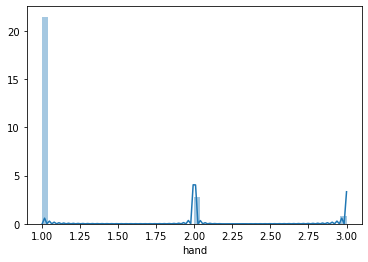

In [109]:
sns.distplot(df[df['Q1'] == 1]['hand']);

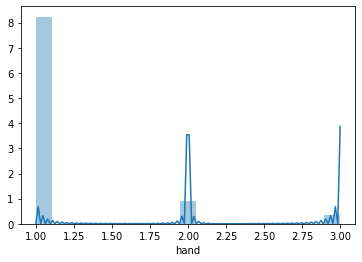

In [110]:
sns.distplot(df[df['Q1'] == 2]['hand']);

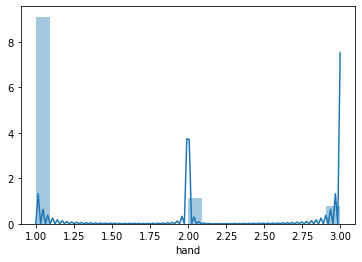

In [111]:
sns.distplot(df[df['Q1'] == 3]['hand']);

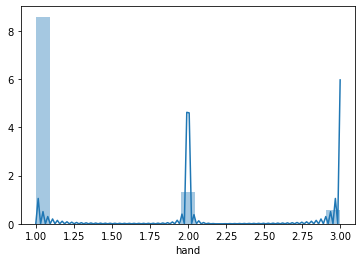

In [112]:
sns.distplot(df[df['Q1'] == 4]['hand']);

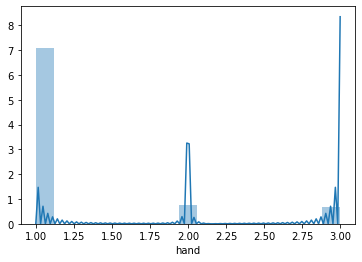

In [113]:
sns.distplot(df[df['Q1'] == 5]['hand']);

The distplots, although kind of difficult to see, seem to tell a similar story. We can do a more explicit test (i.e. the Kolmogorov-Smirnov test to compare distributions) but considering:

the really minor effect of Q1 on left-handedness (as Q1 increases by 1, one is 1.25% less likely to be left-handed),
the subject-matter expertise that means it's very unlikely Q1 affects left-handedness,
and the visual inspection of the table and graphs,
I'm comfortable concluding that there little to no evidence of a difference in the distribution of handedness for different values of Q1.

#### 3. Which question (`Q1`-`Q44`) has the highest association with left-handedness?

**Answer:** It makes more sense for us to use [Spearman correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) instead of the standard [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) because our $Y$ is binary (left-handed vs. not left-handed).

In [115]:
from scipy.stats import spearmanr

In [117]:
#iterating through columns `Q1` through `Q44`.

lst = list(range(1,45))

for i in range(len(lst)):
    lst[i] = "Q" + str(lst[i])

In [119]:
lst

['Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'Q27',
 'Q28',
 'Q29',
 'Q30',
 'Q31',
 'Q32',
 'Q33',
 'Q34',
 'Q35',
 'Q36',
 'Q37',
 'Q38',
 'Q39',
 'Q40',
 'Q41',
 'Q42',
 'Q43',
 'Q44']

In [120]:
corr = 0
p_val = 1
question = 'Q0'

for i in lst:
    spearman = spearmanr(df[i], df['y'])
    print(i, spearman)
    if spearman[1] < p_val:
        corr = spearman[0]
        p_val = spearman[1]
        question = i

print("The question most correlated with left-handedness is " + question + " with correlation of " + str(corr) + " and p_value of " + str(p_val) + ".")

Q1 SpearmanrResult(correlation=-0.00962963447349597, pvalue=0.534013860383785)
Q2 SpearmanrResult(correlation=-0.03020724551273618, pvalue=0.051031916420861585)
Q3 SpearmanrResult(correlation=-0.017014769959872188, pvalue=0.2718189612962998)
Q4 SpearmanrResult(correlation=-0.041727612516423845, pvalue=0.007019479844892741)
Q5 SpearmanrResult(correlation=0.012202331990951337, pvalue=0.4306682078979158)
Q6 SpearmanrResult(correlation=-0.004831476733868781, pvalue=0.7550285676632277)
Q7 SpearmanrResult(correlation=-0.004458464932305096, pvalue=0.7734030320451551)
Q8 SpearmanrResult(correlation=-0.04999285729022068, pvalue=0.0012356129052117388)
Q9 SpearmanrResult(correlation=-0.029388072861660428, pvalue=0.05765995162892377)
Q10 SpearmanrResult(correlation=0.004370722359694957, pvalue=0.7777441439101257)
Q11 SpearmanrResult(correlation=0.0007508257349283278, pvalue=0.961327416392445)
Q12 SpearmanrResult(correlation=-0.009127774964141123, pvalue=0.5555402710311332)
Q13 SpearmanrResult(corr

Wrapping up, we see that Q8 has the strongest correlation with left-handedness. The  𝑝 -value is significant at the most common significance levels, but it's also possible that this is just noise. (By testing 44 different questions, it's likely that at least a handful would seem significant just by random chance.)

### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following:
- Suppose this data were in a `SQL` database named `data` and a table named `inventory`. What `SQL` query would return the count of people who were right-handed, left-handed, both, or missing with their class labels of 1, 2, 3, and 0, respectively? (You can assume you've already logged into the database.)
- Fit and evaluate one or more of the generalized linear models discussed above.
- Create a plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using sensitivity, specificity, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?